# Python для анализа данных

## Web-scraping: скрэйпинг новостного сайта

*Автор: Алла Тамбовцева, НИУ ВШЭ*  

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [ ]:
# soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [ ]:
# print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [6]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/explainatorium
/theme/bookshelf
/theme/Courses
/theme/coronavirus-history
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/explainatorium
/theme/bookshelf
/theme/Courses
/theme/coronavirus-history
https://nplus1.ru/blog/2020/04/02/marsphone
https://nplus1.ru/blog/2020/04/02/marsphone
https://nplus1.ru/blog/2020/04/02/low
https://nplus1.ru/blog/2020/03/23/pompeiis-best-houses
https://nplus1.ru/blog/2020/03/22/infodemia
https://nplus1.ru/blog/2020/03/17/isolation-and-iss
https://nplus1.ru/blog/2020/03/16/ludere-ridere-occest-vivere
https://nplus1.ru/blog/2020/03/12/onemoredelay
https://nplus1.ru/blog/2020/03/12/public-opinion-yudin
https://nplus1.ru/blog/2020/03/06/death-from-the-skies
https://nplus1.ru/blog/2020/04/06/maps-of-meaning
/news/2020/04/08/three-fireballs-europe
/news/2020/04/08/apple-patent
/news/2020/04/08/modernize
/news/2020/04/08/no-chronic-diseases


Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [7]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2020/04/08/three-fireballs-europe',
 '/news/2020/04/08/apple-patent',
 '/news/2020/04/08/modernize',
 '/news/2020/04/08/no-chronic-diseases',
 '/news/2020/04/08/Maxwell-demon-measurement',
 '/news/2020/04/08/ATLAS-no-bright',
 '/news/2020/04/08/skyguardian',
 '/news/2020/04/07/innovative-birds',
 '/news/2020/04/07/giant-viruses-metabolism',
 '/news/2020/04/07/background-greenscreen',
 '/news/2020/04/07/volcano-global-warming',
 '/news/2020/04/07/classical-learning',
 '/news/2020/04/07/gripen',
 '/news/2020/04/02/films-to-science',
 '/news/2020/03/31/hightech-garbage',
 '/news/2020/04/07/polyamorphous-so2',
 '/news/2020/04/07/chinese-wild-blueberry',
 '/news/2020/04/07/Venus-magma-oceans',
 '/news/2020/04/07/penguin-watch',
 '/news/2020/04/07/starliner',
 '/news/2020/04/07/network',
 '/news/2020/04/08/Maxwell-demon-measurement',
 '/news/2020/04/03/sperm-trans-fertility',
 '/news/2020/04/07/polyamorphous-so2',
 '/news/2020/04/01/mistery-of-colours',
 '/news/2020/03/31/deep-carbon

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [8]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2020/04/08/three-fireballs-europe',
 'https://nplus1.ru/news/2020/04/08/apple-patent',
 'https://nplus1.ru/news/2020/04/08/modernize',
 'https://nplus1.ru/news/2020/04/08/no-chronic-diseases',
 'https://nplus1.ru/news/2020/04/08/Maxwell-demon-measurement',
 'https://nplus1.ru/news/2020/04/08/ATLAS-no-bright',
 'https://nplus1.ru/news/2020/04/08/skyguardian',
 'https://nplus1.ru/news/2020/04/07/innovative-birds',
 'https://nplus1.ru/news/2020/04/07/giant-viruses-metabolism',
 'https://nplus1.ru/news/2020/04/07/background-greenscreen',
 'https://nplus1.ru/news/2020/04/07/volcano-global-warming',
 'https://nplus1.ru/news/2020/04/07/classical-learning',
 'https://nplus1.ru/news/2020/04/07/gripen',
 'https://nplus1.ru/news/2020/04/02/films-to-science',
 'https://nplus1.ru/news/2020/03/31/hightech-garbage',
 'https://nplus1.ru/news/2020/04/07/polyamorphous-so2',
 'https://nplus1.ru/news/2020/04/07/chinese-wild-blueberry',
 'https://nplus1.ru/news/2020/04/07/Venus-mag

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [9]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [10]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2020-04-08" itemprop="datePublished"/>,
 <meta content="Григорий Копиев" name="mediator_author"/>,
 <meta content="Направление взгляда может отслеживать умная колонка или смартфон" name="description"/>,
 <meta content="Григорий Копиев" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Apple предложила уточнять голосовые команды взглядом" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2020/04/08/0b532928396f8a9fb7247a2ac279d042.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2020/04/08/apple-patent" property="og:url"/>,
 <meta content="Направление взгляда может отслеживать умная колонка или смартфон" property="og:description"/>,
 <met

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [11]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Григорий Копиев" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [12]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Григорий Копиев" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [13]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Григорий Копиев'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [14]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Григорий Копиев'

Аналогичным образом извлечем дату, заголовок и описание.

In [15]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [16]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="gadgets" href="/rubric/gadgets">Гаджеты</a>
 <a data-rubric="it" href="/rubric/it">IT</a>
 </p>, <p class="table">
 <a href="/news/2020/04/08">
 <time content="2020-04-08" data-unix="1586349836" itemprop="datePublished">
 <span>15:43</span>
 <span>08 Апр. 2020</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/1.6">
 <span>Сложность</span>
 <span class="difficult-value">1.6</span>
 </a>
 </p>, <p class="title"></p>, <p class="credits">Apple / USPTO</p>, <p>Компания Apple предложила дополнять умные колонки камерами, чтобы пользователь мог активировать их взглядом и указывать на другие объекты, с которыми он хочет взаимодействовать. Например, если он хочет включить один из умных светильников в комнате, он может попросить колонку об этом и показать взглядом, какой именно из светильников его интересует. Патентная заявка <a href="http://appft.uspto.gov/netacgi/nph-Parser?Sect1=PTO1&amp;Sect2=HITOFF&amp;d=PG01&amp;p=1&amp;u=%2Fnetahtml%2FP

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [17]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="gadgets" href="/rubric/gadgets">Гаджеты</a>,
 <a data-rubric="it" href="/rubric/it">IT</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [18]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Гаджеты', 'IT']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [19]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">1.6</span>]

И выберем оттуда текст.

In [20]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'1.6'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [21]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [22]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [23]:
final_text = ' '.join(text)
final_text

'Компания Apple предложила дополнять умные колонки камерами, чтобы пользователь мог активировать их\xa0взглядом и\xa0указывать на\xa0другие объекты, с\xa0которыми он\xa0хочет взаимодействовать. Например, если он\xa0хочет включить один из\xa0умных светильников в\xa0комнате, он\xa0может попросить колонку об\xa0этом и\xa0показать взглядом, какой именно из\xa0светильников его интересует. Патентная заявка опубликована на\xa0сайте ведомства по\xa0патентам и\xa0товарным знакам США (USPTO). У\xa0умных колонок есть несколько основных функций, одна из\xa0которых\xa0— это управление устройствами умного дома. Благодаря тому, что все больше предметов бытовой техники поддерживает платформы умного дома, уже сейчас при желании можно создать дом, в\xa0котором почти все электронные устройства управляются голосом. Но\xa0в\xa0таком случае возникают проблемы, потому что некоторые устройства в\xa0доме или даже одной комнате дублируются. Существующие сегодня платформы умного дома, например, от\xa0Яндекса, по

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [24]:
final_text = final_text.replace('\n', ' ')

Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [26]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [27]:
from time import sleep

In [28]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [29]:
news[0]

('https://nplus1.ru/news/2020/04/08/three-fireballs-europe',
 '2020-04-08',
 'Евгения Скареднева',
 'Две ярких вспышки над Бельгией и одну над Германией и Австрией зафиксировали сети мониторинга метеоров',
 'Три болида пролетели над Центральной Европой за три часа',
 'В ночь с 1 на 2 апреля над Центральной Европой в течение трех часов пролетели три болида, причем два из них — за один час. Об этом\xa0сообщает\xa0Международная метеорная организация (International Meteor Organization, IMO). По разным оценкам в\xa0атмосферу Земли за\xa0день попадает от\xa05\xa0до\xa0300 тонн космической пыли. Сгорающие в\xa0верхних слоях частицы, оставляющие светящийся след, называют метеорами. Очень яркие метеоры, или болиды, возникают, когда в\xa0атмосферу попадает тело метровых размеров и\xa0больше\xa0— яркость вспышки в\xa0таком случае превышает яркость Венеры. Как правило, такие метеоры\xa0— одиночное явление.  Теперь же IMO сообщила сразу о трех таких событиях, произошедших за короткий промежуток вре

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame(news)

In [32]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2020/04/08/three-fireba...,2020-04-08,Евгения Скареднева,Две ярких вспышки над Бельгией и одну над Герм...,Три болида пролетели над Центральной Европой з...,В ночь с 1 на 2 апреля над Центральной Европой...,[Астрономия],1.5
1,https://nplus1.ru/news/2020/04/08/apple-patent,2020-04-08,Григорий Копиев,Направление взгляда может отслеживать умная ко...,Apple предложила уточнять голосовые команды вз...,Компания Apple предложила дополнять умные коло...,"[Гаджеты, IT]",1.6


Переименуем столбцы в базе.

In [33]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [34]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2020/04/08/three-fireba...,2020-04-08,Евгения Скареднева,Две ярких вспышки над Бельгией и одну над Герм...,Три болида пролетели над Центральной Европой з...,В ночь с 1 на 2 апреля над Центральной Европой...,[Астрономия],1.5
1,https://nplus1.ru/news/2020/04/08/apple-patent,2020-04-08,Григорий Копиев,Направление взгляда может отслеживать умная ко...,Apple предложила уточнять голосовые команды вз...,Компания Apple предложила дополнять умные коло...,"[Гаджеты, IT]",1.6


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [35]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [36]:
df.diffc.describe()

count    30.000000
mean      3.846667
std       1.644999
min       1.100000
25%       2.950000
50%       3.450000
75%       5.375000
max       6.200000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

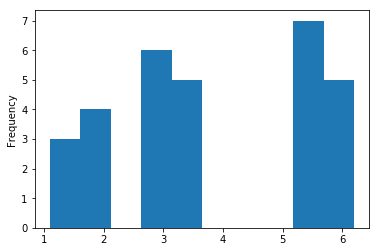

In [37]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [38]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [39]:
df.text[0]

'В ночь с 1 на 2 апреля над Центральной Европой в течение трех часов пролетели три болида, причем два из них — за один час. Об этом\xa0сообщает\xa0Международная метеорная организация (International Meteor Organization, IMO). По разным оценкам в\xa0атмосферу Земли за\xa0день попадает от\xa05\xa0до\xa0300 тонн космической пыли. Сгорающие в\xa0верхних слоях частицы, оставляющие светящийся след, называют метеорами. Очень яркие метеоры, или болиды, возникают, когда в\xa0атмосферу попадает тело метровых размеров и\xa0больше\xa0— яркость вспышки в\xa0таком случае превышает яркость Венеры. Как правило, такие метеоры\xa0— одиночное явление.  Теперь же IMO сообщила сразу о трех таких событиях, произошедших за короткий промежуток времени. Два болида\xa0— метеора, более ярких, чем Венера, — попали в\xa0объектив камеры проекта CAMS\xa0NASA, которая находится в\xa0бельгийском городе Графонтен. Они также были зафиксированы камерами сети FRIPON, которая объединяет более 100 камер полного неба и\xa0при

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [40]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [41]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [42]:
df.clean_text[0]

'В ночь с 1 на 2 апреля над Центральной Европой в течение трех часов пролетели три болида, причем два из них — за один час. Об этом сообщает Международная метеорная организация (International Meteor Organization, IMO). По разным оценкам в атмосферу Земли за день попадает от 5 до 300 тонн космической пыли. Сгорающие в верхних слоях частицы, оставляющие светящийся след, называют метеорами. Очень яркие метеоры, или болиды, возникают, когда в атмосферу попадает тело метровых размеров и больше — яркость вспышки в таком случае превышает яркость Венеры. Как правило, такие метеоры — одиночное явление.  Теперь же IMO сообщила сразу о трех таких событиях, произошедших за короткий промежуток времени. Два болида — метеора, более ярких, чем Венера, — попали в объектив камеры проекта CAMS NASA, которая находится в бельгийском городе Графонтен. Они также были зафиксированы камерами сети FRIPON, которая объединяет более 100 камер полного неба и приемников радиосигнала на территории Франции, Бельгии и 

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [43]:
df.to_excel('nplus-news.xlsx')